Task 1.1


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gradient_descent import gradient_descent
from linear_cost import linear_cost, linear_cost_gradient
from pandas import read_csv

#task 1.1
data = read_csv('kc_house_data.csv', header=0, index_col=0)
data = data.drop(columns=['date'])

x = data['sqft_living']
x = np.array(x)

Task 1.2

In [2]:

#task 1.2 implementar regresion


TRAINING_SET_SIZE = x.shape[0]

X = np.vstack(
    (
        np.ones(TRAINING_SET_SIZE),
        x,
        # x ** 2,
    )
).T

y = np.array(data['price']).reshape(TRAINING_SET_SIZE, 1)
# y = y ** 2

m, n = X.shape
theta_0 = np.random.rand(n, 1)

task 1.3

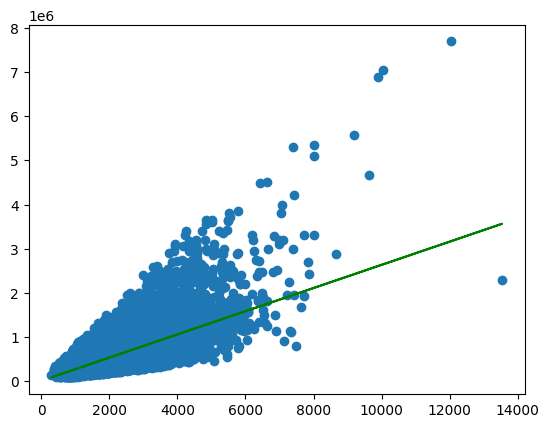

In [10]:

# task 1.3 
r_theta, costs, thetas = gradient_descent(
    theta_0=theta_0,
    cost_function=linear_cost,
    cost_function_gradient=linear_cost_gradient,
    learning_rate=0.00000001,
    threshold=0.001,
    max_iter=10000,
    params=(X,y,1),
)

for test_theta in thetas:
    pass

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ test_theta, color='green')
plt.show()


task 1.4

In [ ]:
# task 1.4 cross validation



task 1.5

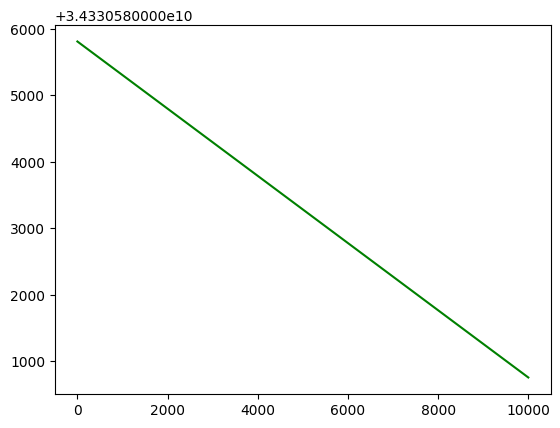

[34330585807.749863, 34330585807.244232, 34330585806.73859, 34330585806.232964, 34330585805.72733, 34330585805.22169, 34330585804.716064, 34330585804.21043, 34330585803.70479, 34330585803.199165, 34330585802.693527, 34330585802.18789, 34330585801.682266, 34330585801.17663, 34330585800.670994, 34330585800.165367, 34330585799.65972, 34330585799.154095, 34330585798.64846, 34330585798.142822, 34330585797.637188, 34330585797.13156, 34330585796.625923, 34330585796.1203, 34330585795.614655, 34330585795.109024, 34330585794.603394, 34330585794.097755, 34330585793.592125, 34330585793.086494, 34330585792.580856, 34330585792.075233, 34330585791.56959, 34330585791.063957, 34330585790.55833, 34330585790.052692, 34330585789.54705, 34330585789.041424, 34330585788.53579, 34330585788.03016, 34330585787.524525, 34330585787.01889, 34330585786.51326, 34330585786.007618, 34330585785.50199, 34330585784.996365, 34330585784.490726, 34330585783.98509, 34330585783.479458, 34330585782.973827, 34330585782.468193, 

In [17]:
# task 1.5 analisis de resultados

for cost in costs:
    pass

# plt.scatter(X[:, 1], y)
plt.plot(costs, color='green')
plt.show()
print(costs)


In [4]:
n1,n2,n3,n4 =np.array_split(y,4)

target = np.array([i for i in range(4)])


k = 3


split_size = len(features) // k

for i in range(k):
    start = i * split_size
    end = (i + 1) * split_size
    
    X_test = features[start:end]
    y_test = target[start:end]
    
    X_train = np.concatenate((features[:start], features[end:]), axis=0)
    y_train = np.concatenate((target[:start], target[end:]), axis=0)
    

(5404, 1)
(5403, 1)
(5403, 1)
(5403, 1)
(21613, 1)


### analisis
se determino por cross validation que el grado de polinomio que mejor describe la nube de puntos es lineal, osea 1. 
la grafica muestra como la nube sigue esta tendencia determinada por el modelo marcado en verde. 